<a href="https://colab.research.google.com/github/sheezarainbow9/Notebooks/blob/main/Sheeza_Aula05_ML_analiseClienteEcommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Análise de dados para aumentar nível de satisfação dos clientes de um e-commerce utilizando árvore de decisão.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Leitura das tabelas .csv:

In [10]:
tabela_cliente = pd.read_csv('/content/olist_customers_dataset.csv')
tabela_localizacao = pd.read_csv('/content/olist_geolocation_dataset.csv')
tabela_pedido = pd.read_csv('/content/olist_order_items_dataset.csv')
tabela_pagamento = pd.read_csv('/content/olist_order_payments_dataset.csv')
tabela_review = pd.read_csv('/content/olist_order_reviews_dataset.csv')
tabela_entrega_pedido = pd.read_csv('/content/olist_orders_dataset.csv')
tabela_descricao_produto = pd.read_csv('/content/olist_products_dataset.csv')
tabela_vendedor = pd.read_csv('/content/olist_sellers_dataset.csv')
tabela_categoria_traduzido = pd.read_csv('/content/product_category_name_translation.csv')

Checagem dos 5 primeiros elementos de cada tabela:

In [11]:
tabela_cliente.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [12]:
tabela_localizacao.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [13]:
tabela_pedido.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
tabela_pagamento.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [15]:
tabela_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [16]:
tabela_entrega_pedido.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [17]:
tabela_descricao_produto.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [18]:
tabela_vendedor.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [19]:
tabela_categoria_traduzido.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Início do processo de união das 9 tabelas disponibilizadas com a finalidade de produzir uma tabela resultante que possua os elementos mais importantes para a determinação do review_score. No primeiro merge realizado, unimos a tabela de clientes com as entregas dos pedidos usando o código individual de cada consumidor como parâmetro.

In [20]:
pd.merge(tabela_cliente, tabela_entrega_pedido, on=["customer_id"], how="inner")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


Processo de união com as demais tabelas disponibilizadas:

1 - (Clientes, Entregas);
2 - (2, Pedidos);
3 - (3, Pagamentos);
4 - (3, Review);
5 - (4, Vendedor)

In [21]:
test = pd.merge(tabela_cliente, tabela_entrega_pedido, on=['customer_id'], how='inner')
test = pd.merge(test, tabela_pedido, on=['order_id'], how='inner')
test = pd.merge(test, tabela_pagamento, on=['order_id'], how='inner')
test = pd.merge(test, tabela_review, on=['order_id'], how='inner')
test = pd.merge(test, tabela_vendedor, on=['seller_id'], how='inner')

In [22]:
test

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,8577,itaquaquecetuba,SP
1,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,157.73,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,8577,itaquaquecetuba,SP
2,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,173.30,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,8577,itaquaquecetuba,SP
3,4c06b42fbf7b97ab10779cda5549cd1c,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA,997fd4b37386d10b57d4ac8cdec011a6,delivered,2018-07-08 09:59:19,2018-07-08 10:30:15,2018-07-25 15:12:00,...,315.75,2518803238cabbf63564593e4a8fc52d,1,Nada de produto,"Ainda não recebi o produto. Sendo assim, não p...",2018-08-09 00:00:00,2018-08-14 11:40:54,8577,itaquaquecetuba,SP
4,8276de07ef25225d412b8462d73f8664,332cf4e83e16004ba7dca932ce82475b,90010,porto alegre,RS,b63fff1ef8b6201df68bb611ee41129e,delivered,2017-04-02 22:15:27,2017-04-04 05:55:19,2017-04-13 16:28:06,...,146.21,84467f1766775ba4c14fc25b3ca67905,4,NaN,"A crítica é à entrega, pois por se tratar dos ...",2017-05-03 00:00:00,2017-05-03 21:06:33,8577,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,eda10d7eb51a675d000956fa1aabc7dd,5c22dbb9d8b5385953f2f1e6d9d115a7,39920,jordania,MG,b494f624c631105b24fe497277085909,delivered,2018-08-01 18:58:49,2018-08-02 18:50:15,2018-08-03 15:39:00,...,72.18,709ee020ff826ee5289d7dd5d6911d0c,5,NaN,NaN,2018-08-14 00:00:00,2018-08-15 11:31:29,87015,maringa,PR
117325,f0f671d4034e98cdf20f0c452d6db02b,6532316a8c1a7c7a569482db073530bb,7231,guarulhos,SP,f73b31435ce6dec43df056154c39a1ce,shipped,2018-08-20 12:37:54,2018-08-20 15:35:42,2018-08-24 16:48:00,...,775.98,274e38de8990f74fc03894fa488b5cd5,3,PRODUTO,NÃO TENHO COMO AVALIAR POIS AINDA NÃO RECEBI O...,2018-08-29 00:00:00,2018-08-30 12:07:35,9861,sbc,SP
117326,b90b857a277b080d8078332b3636ab58,7f5f43a9394964ac51bc5d1e0204ead4,76400,uruacu,GO,d76fe905f4588ad69ab3b36527bb267d,delivered,2018-08-18 20:59:58,2018-08-18 21:10:13,2018-08-20 16:49:00,...,224.44,6010e1ba95a9e19dc10a7b761932cf98,5,NaN,NaN,2018-08-29 00:00:00,2018-08-29 21:43:39,83015,sao jose dos pinhais,PR
117327,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,bom repouso,MG,51c6d2f460589fa7b65f2da51e860206,delivered,2017-11-14 12:04:09,2017-11-14 12:15:25,2017-11-27 20:44:47,...,167.79,603f2873842a6975a43c54d305397d69,1,NaN,NaN,2017-12-14 00:00:00,2017-12-16 13:50:11,12914,braganca paulista,SP


Segunda filtragem consiste em remover elementos que não possuem relação com a variável review_score.

In [23]:
test = test.drop(columns=['customer_unique_id'], axis=1)
test = test.drop(columns=['customer_city'], axis=1)
test = test.drop(columns=['customer_state'], axis=1)
test = test.drop(columns=['order_status'], axis=1)
test = test.drop(columns=['order_purchase_timestamp'], axis=1)
test = test.drop(columns=['order_approved_at'], axis=1)
test = test.drop(columns=['order_delivered_carrier_date'], axis=1)
test = test.drop(columns=['order_delivered_customer_date'], axis=1)
test = test.drop(columns=['order_estimated_delivery_date'], axis=1)
test = test.drop(columns=['shipping_limit_date'], axis=1)
test = test.drop(columns=['review_creation_date'], axis=1)
test = test.drop(columns=['review_answer_timestamp'], axis=1)
test = test.drop(columns=['seller_city'], axis=1)
test = test.drop(columns=['seller_state'], axis=1)
test = test.drop(columns=['review_comment_title'], axis=1)
test = test.drop(columns=['review_comment_message'], axis=1)

Tabela resultante após a remoção de atributos não prioritários para o nível de satisfação dos clientes:

Linhas: 117329
Colunas: 15

In [24]:
test

,customer_id,customer_zip_code_prefix,order_id,order_item_id,product_id,seller_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,seller_zip_code_prefix
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,00e7ee1b050b8499577073aeb2a297a1,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,8577
1,4e7b3e00288586ebd08712fdd0374a03,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,1,credit_card,7,157.73,5ad6695d76ee186dc473c42706984d87,5,8577
2,b2b6027bc5c5109e529d4dc6358b12c3,8775,951670f92359f4fe4a63112aa7306eba,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,1,credit_card,1,173.30,059a801bb31f6aab2266e672cab87bc5,5,8577
3,4c06b42fbf7b97ab10779cda5549cd1c,65075,997fd4b37386d10b57d4ac8cdec011a6,1,8ed094bfe076c568f6bb10feada3f75d,7c67e1448b00f6e969d365cea6b010ab,199.98,115.77,1,credit_card,6,315.75,2518803238cabbf63564593e4a8fc52d,1,8577
4,8276de07ef25225d412b8462d73f8664,90010,b63fff1ef8b6201df68bb611ee41129e,1,aba86c093ccdbac75b09111d57e50004,7c67e1448b00f6e969d365cea6b010ab,129.60,16.61,1,boleto,1,146.21,84467f1766775ba4c14fc25b3ca67905,4,8577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,eda10d7eb51a675d000956fa1aabc7dd,39920,b494f624c631105b24fe497277085909,1,a2fce4213a6ac271129618259a334261,9140ef75cc8211c4035935e80e567204,49.90,22.28,1,credit_card,3,72.18,709ee020ff826ee5289d7dd5d6911d0c,5,87015
117325,f0f671d4034e98cdf20f0c452d6db02b,7231,f73b31435ce6dec43df056154c39a1ce,1,5ece1e51ece4648de249ec6e9d007fd6,da4d149c0ddbac90557103ac0a0ec356,730.00,45.98,1,credit_card,10,775.98,274e38de8990f74fc03894fa488b5cd5,3,9861
117326,b90b857a277b080d8078332b3636ab58,76400,d76fe905f4588ad69ab3b36527bb267d,1,d6e7ac236e583af1e1543d8068c91676,377bc18334c78dd2f1535ef22a3ad225,135.98,88.46,1,credit_card,6,224.44,6010e1ba95a9e19dc10a7b761932cf98,5,83015
117327,1ed0c832c2dd99570a59260e71768bdf,37610,51c6d2f460589fa7b65f2da51e860206,1,c98bf47f7bea8f3aee82fa023786b8a1,51a04a8a6bdcb23deccc82b0b80742cf,167.99,31.93,1,credit_card,5,167.79,603f2873842a6975a43c54d305397d69,1,12914


Inserindo cada atributo da tabela resultante em um vetor para melhor manipulação dos dados:

In [25]:
vetor_cliente = np.array(test.customer_id)
vetor_cepcliente = np.array(test.customer_zip_code_prefix)
vetor_pedido = np.array(test.order_id)
vetor_idpedido = np.array(test.order_item_id)
vetor_produto = np.array(test.product_id)
vetor_vendedor = np.array(test.seller_id)
vetor_preco_produto = np.array(test.price)
vetor_frete = np.array(test.freight_value)
vetor_parcela = np.array(test.payment_sequential)
vetor_tipopagamento = np.array(test.payment_type)
vetor_pay = np.array(test.payment_installments)
vetor_valorfinal = np.array(test.payment_value)
vetor_cliente = np.array(test.customer_id)
vetor_review = np.array(test.review_id)
vetor_score = np.array(test.review_score)
vetor_cepvendedor = np.array(test.seller_zip_code_prefix)

Definindo um novo dataframe vazio:

In [26]:
df = pd.DataFrame()
df

""


Definindo as colunas do novo dataframe e atribuindo para cada coluna, seu respectivo vetor de dados registrado anteriormente:

In [27]:
COLUNAS = [
    'Cliente',
    'CEP_Cliente',
    'Pedido',
    'id_Pedido',
    'Produto',
    'Vendedor',
    'Preco_produto',
    'Frete',
    'Parcela',
    'Tipo_pagamento',
    'Installments',
    'Valor_total',
    'ID_Review',
    'CEP_Vendedor',
    'Score'
    ]

df = pd.DataFrame(columns = COLUNAS)

df.Cliente = vetor_cliente
df.CEP_Cliente = vetor_cepcliente
df.Pedido = vetor_pedido
df.id_Pedido = vetor_idpedido
df.Produto = vetor_produto
df.Vendedor = vetor_vendedor
df.Preco_produto = vetor_preco_produto
df.Frete = vetor_frete
df.Parcela = vetor_parcela
df.Tipo_pagamento = vetor_tipopagamento
df.Installments = vetor_pay
df.Valor_total = vetor_valorfinal
df.ID_Review = vetor_review
df.CEP_Vendedor = vetor_cepvendedor
df.Score = vetor_score
df

,Cliente,CEP_Cliente,Pedido,id_Pedido,Produto,Vendedor,Preco_produto,Frete,Parcela,Tipo_pagamento,Installments,Valor_total,ID_Review,CEP_Vendedor,Score
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,00e7ee1b050b8499577073aeb2a297a1,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,8577,4
1,4e7b3e00288586ebd08712fdd0374a03,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,1,credit_card,7,157.73,5ad6695d76ee186dc473c42706984d87,8577,5
2,b2b6027bc5c5109e529d4dc6358b12c3,8775,951670f92359f4fe4a63112aa7306eba,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,1,credit_card,1,173.30,059a801bb31f6aab2266e672cab87bc5,8577,5
3,4c06b42fbf7b97ab10779cda5549cd1c,65075,997fd4b37386d10b57d4ac8cdec011a6,1,8ed094bfe076c568f6bb10feada3f75d,7c67e1448b00f6e969d365cea6b010ab,199.98,115.77,1,credit_card,6,315.75,2518803238cabbf63564593e4a8fc52d,8577,1
4,8276de07ef25225d412b8462d73f8664,90010,b63fff1ef8b6201df68bb611ee41129e,1,aba86c093ccdbac75b09111d57e50004,7c67e1448b00f6e969d365cea6b010ab,129.60,16.61,1,boleto,1,146.21,84467f1766775ba4c14fc25b3ca67905,8577,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,eda10d7eb51a675d000956fa1aabc7dd,39920,b494f624c631105b24fe497277085909,1,a2fce4213a6ac271129618259a334261,9140ef75cc8211c4035935e80e567204,49.90,22.28,1,credit_card,3,72.18,709ee020ff826ee5289d7dd5d6911d0c,87015,5
117325,f0f671d4034e98cdf20f0c452d6db02b,7231,f73b31435ce6dec43df056154c39a1ce,1,5ece1e51ece4648de249ec6e9d007fd6,da4d149c0ddbac90557103ac0a0ec356,730.00,45.98,1,credit_card,10,775.98,274e38de8990f74fc03894fa488b5cd5,9861,3
117326,b90b857a277b080d8078332b3636ab58,76400,d76fe905f4588ad69ab3b36527bb267d,1,d6e7ac236e583af1e1543d8068c91676,377bc18334c78dd2f1535ef22a3ad225,135.98,88.46,1,credit_card,6,224.44,6010e1ba95a9e19dc10a7b761932cf98,83015,5
117327,1ed0c832c2dd99570a59260e71768bdf,37610,51c6d2f460589fa7b65f2da51e860206,1,c98bf47f7bea8f3aee82fa023786b8a1,51a04a8a6bdcb23deccc82b0b80742cf,167.99,31.93,1,credit_card,5,167.79,603f2873842a6975a43c54d305397d69,12914,1


Impressão da coluna de clientes:

In [28]:
df.Cliente

0         06b8999e2fba1a1fbc88172c00ba8bc7
1         4e7b3e00288586ebd08712fdd0374a03
2         b2b6027bc5c5109e529d4dc6358b12c3
3         4c06b42fbf7b97ab10779cda5549cd1c
4         8276de07ef25225d412b8462d73f8664
                        ...               
117324    eda10d7eb51a675d000956fa1aabc7dd
117325    f0f671d4034e98cdf20f0c452d6db02b
117326    b90b857a277b080d8078332b3636ab58
117327    1ed0c832c2dd99570a59260e71768bdf
117328    1ed0c832c2dd99570a59260e71768bdf
Name: Cliente, Length: 117329, dtype: object

Informações:

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Cliente         117329 non-null  object 
 1   CEP_Cliente     117329 non-null  int64  
 2   Pedido          117329 non-null  object 
 3   id_Pedido       117329 non-null  int64  
 4   Produto         117329 non-null  object 
 5   Vendedor        117329 non-null  object 
 6   Preco_produto   117329 non-null  float64
 7   Frete           117329 non-null  float64
 8   Parcela         117329 non-null  int64  
 9   Tipo_pagamento  117329 non-null  object 
 10  Installments    117329 non-null  int64  
 11  Valor_total     117329 non-null  float64
 12  ID_Review       117329 non-null  object 
 13  CEP_Vendedor    117329 non-null  int64  
 14  Score           117329 non-null  int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 13.4+ MB


Agrupando os elementos do dataframe por consumidor:

In [30]:
df.groupby(by='Cliente').size()

Cliente
00012a2ce6f8dcda20d059ce98491703    1
000161a058600d5901f007fab4c27140    1
0001fd6190edaaf884bcaf3d49edf079    1
0002414f95344307404f0ace7a26f1d5    1
000379cdec625522490c315e70c7a9fb    1
                                   ..
fffcb937e9dd47a13f05ecb8290f4d3e    1
fffecc9f79fd8c764f843e9951b11341    3
fffeda5b6d849fbd39689bb92087f431    1
ffff42319e9b2d713724ae527742af25    1
ffffa3172527f765de70084a7e53aae8    2
Length: 97916, dtype: int64

Importando os métodos de árvore de decisão:

In [31]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics

Para simplificar os dados e evitar criar um dummy com esse dataframe, removemos todos os elementos não-numéricos para que o modelo seja capaz de relizar a execução. Solução encontrada para simplificar os atributos do tipo 'Objeto' para tipos numéricos.

r'\D', '' - procura onde tem letra e deixa somente os números. (r: read; '': deixará somente os números)

In [32]:
df['Cliente'] = df['Cliente'].str.replace(r'\D', '')
df['Pedido'] = df['Pedido'].str.replace(r'\D', '')
df['Produto'] = df['Produto'].str.replace(r'\D', '')
df['Vendedor'] = df['Vendedor'].str.replace(r'\D', '')
df['ID_Review'] = df['ID_Review'].str.replace(r'\D', '')
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,Cliente,CEP_Cliente,Pedido,id_Pedido,Produto,Vendedor,Preco_produto,Frete,Parcela,Tipo_pagamento,Installments,Valor_total,ID_Review,CEP_Vendedor,Score
0,068999211881720087,14409,0071050849957707322971,1,9516079379936978101698,76714480069693656010,124.99,21.88,1,credit_card,2,146.87,88852460269121365930,8577,4
1,4730028858608712037403,1151,205967144362972992,1,0766896614945862518487,76714480069693656010,139.94,17.79,1,credit_card,7,157.73,56695761864734270698487,8577,5
2,260275510952946358123,8775,9516709235944631127306,1,564744977148034751092,76714480069693656010,149.94,23.36,1,credit_card,1,173.30,0598013162266672875,8577,5
3,406427971077955491,65075,9974373861057480116,1,8094076568610375,76714480069693656010,199.98,115.77,1,credit_card,6,315.75,2518803238635645934852,8577,1
4,827607252254128462738664,90010,631862016861141129,1,8609375091115750004,76714480069693656010,129.60,16.61,1,boleto,1,146.21,84467176677541425367905,8577,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,1075167500095617,39920,49462463110524497277085909,1,242136271129618259334261,9140758211403593580567204,49.90,22.28,1,credit_card,3,72.18,70902082652897569110,87015,5
117325,0671403498200452602,7231,7331435643056154391,1,51514648249690076,414909055710300356,730.00,45.98,1,credit_card,10,775.98,274388990740389448855,9861,3
117326,908572770808078332363658,76400,76905458869336527267,1,6723658311543806891676,377183347821535223225,135.98,88.46,1,credit_card,6,224.44,601019591910776193298,83015,5
117327,108322995705926071768,37610,5162460589765251860206,1,98477838202378681,5104862382080742,167.99,31.93,1,credit_card,5,167.79,60328738426975435430539769,12914,1


Realizamos o procedimento de remoção dos elementos não-numéricos para todas as colunas do tipo objeto com exceção do tipo de pagamento pois o tipo de pagamento se resume a poucas opções. Dessa forma, usamos a função get_dummies apenas para o tipo de pagamento.

Portanto, a coluna Tipo_pagamento se divide em quatro colunas com lógica booleana. As novas colunas são: 

Tipo_pagamento_boleto, Tipo_pagamento_credit_card, Tipo_pagamento_debit_card, Tipo_pagamento_voucher

In [33]:
result_df = pd.get_dummies(df, columns=['Tipo_pagamento'])

Resultado final do dataframe:

In [34]:
result_df

,Cliente,CEP_Cliente,Pedido,id_Pedido,Produto,Vendedor,Preco_produto,Frete,Parcela,Installments,Valor_total,ID_Review,CEP_Vendedor,Score,Tipo_pagamento_boleto,Tipo_pagamento_credit_card,Tipo_pagamento_debit_card,Tipo_pagamento_voucher
0,068999211881720087,14409,0071050849957707322971,1,9516079379936978101698,76714480069693656010,124.99,21.88,1,2,146.87,88852460269121365930,8577,4,0,1,0,0
1,4730028858608712037403,1151,205967144362972992,1,0766896614945862518487,76714480069693656010,139.94,17.79,1,7,157.73,56695761864734270698487,8577,5,0,1,0,0
2,260275510952946358123,8775,9516709235944631127306,1,564744977148034751092,76714480069693656010,149.94,23.36,1,1,173.30,0598013162266672875,8577,5,0,1,0,0
3,406427971077955491,65075,9974373861057480116,1,8094076568610375,76714480069693656010,199.98,115.77,1,6,315.75,2518803238635645934852,8577,1,0,1,0,0
4,827607252254128462738664,90010,631862016861141129,1,8609375091115750004,76714480069693656010,129.60,16.61,1,1,146.21,84467176677541425367905,8577,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,1075167500095617,39920,49462463110524497277085909,1,242136271129618259334261,9140758211403593580567204,49.90,22.28,1,3,72.18,70902082652897569110,87015,5,0,1,0,0
117325,0671403498200452602,7231,7331435643056154391,1,51514648249690076,414909055710300356,730.00,45.98,1,10,775.98,274388990740389448855,9861,3,0,1,0,0
117326,908572770808078332363658,76400,76905458869336527267,1,6723658311543806891676,377183347821535223225,135.98,88.46,1,6,224.44,601019591910776193298,83015,5,0,1,0,0
117327,108322995705926071768,37610,5162460589765251860206,1,98477838202378681,5104862382080742,167.99,31.93,1,5,167.79,60328738426975435430539769,12914,1,0,1,0,0


Criação de um dataframe reserva para possíveis conclusões:

In [35]:
reserva = result_df
reserva

,Cliente,CEP_Cliente,Pedido,id_Pedido,Produto,Vendedor,Preco_produto,Frete,Parcela,Installments,Valor_total,ID_Review,CEP_Vendedor,Score,Tipo_pagamento_boleto,Tipo_pagamento_credit_card,Tipo_pagamento_debit_card,Tipo_pagamento_voucher
0,068999211881720087,14409,0071050849957707322971,1,9516079379936978101698,76714480069693656010,124.99,21.88,1,2,146.87,88852460269121365930,8577,4,0,1,0,0
1,4730028858608712037403,1151,205967144362972992,1,0766896614945862518487,76714480069693656010,139.94,17.79,1,7,157.73,56695761864734270698487,8577,5,0,1,0,0
2,260275510952946358123,8775,9516709235944631127306,1,564744977148034751092,76714480069693656010,149.94,23.36,1,1,173.30,0598013162266672875,8577,5,0,1,0,0
3,406427971077955491,65075,9974373861057480116,1,8094076568610375,76714480069693656010,199.98,115.77,1,6,315.75,2518803238635645934852,8577,1,0,1,0,0
4,827607252254128462738664,90010,631862016861141129,1,8609375091115750004,76714480069693656010,129.60,16.61,1,1,146.21,84467176677541425367905,8577,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,1075167500095617,39920,49462463110524497277085909,1,242136271129618259334261,9140758211403593580567204,49.90,22.28,1,3,72.18,70902082652897569110,87015,5,0,1,0,0
117325,0671403498200452602,7231,7331435643056154391,1,51514648249690076,414909055710300356,730.00,45.98,1,10,775.98,274388990740389448855,9861,3,0,1,0,0
117326,908572770808078332363658,76400,76905458869336527267,1,6723658311543806891676,377183347821535223225,135.98,88.46,1,6,224.44,601019591910776193298,83015,5,0,1,0,0
117327,108322995705926071768,37610,5162460589765251860206,1,98477838202378681,5104862382080742,167.99,31.93,1,5,167.79,60328738426975435430539769,12914,1,0,1,0,0


Eliminando todas as linhas com nível 4 ou nível 5 de satisfação. Dessa forma, temos um dataframe com todos os dados, e um apenas com dados classificados com nível 3, 2 ou 1 ou seja, mediano, ruim ou péssimo. (elementos que apresentam nível de insatisfação interessante para análise)

In [36]:
reserva = reserva.drop(reserva[reserva.Score > 3].index)
reserva

,Cliente,CEP_Cliente,Pedido,id_Pedido,Produto,Vendedor,Preco_produto,Frete,Parcela,Installments,Valor_total,ID_Review,CEP_Vendedor,Score,Tipo_pagamento_boleto,Tipo_pagamento_credit_card,Tipo_pagamento_debit_card,Tipo_pagamento_voucher
3,406427971077955491,65075,9974373861057480116,1,8094076568610375,76714480069693656010,199.98,115.77,1,6,315.75,2518803238635645934852,8577,1,0,1,0,0
7,0372810041857927016263,21010,369525670169482825831,1,9149964056487642250089,76714480069693656010,78.98,39.48,1,1,118.46,50240342442053299029167,8577,2,1,0,0,0
18,45800571938861445,13485,3793048208056190003,1,073816586646007781918834,76714480069693656010,209.99,36.98,1,4,246.97,19338660916893707370094,8577,3,0,1,0,0
19,19530467435951219042,20920,54813422788333035171945,1,466668028836324039256,76714480069693656010,159.98,49.49,1,1,209.47,576586473748925439048,8577,1,1,0,0,0
21,52814168460899591,36091,532771277634465595,1,44685813716436,76714480069693656010,129.94,73.86,1,4,203.80,47648253909483401757,8577,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117320,049671902463228846651580,4929,93358729701080188455,1,72966155721853046438,929923957665903146465,109.00,12.67,1,1,121.67,4396354052945949758,4310,1,1,0,0,0
117323,211018165721598633401,18650,357035504504584,1,44442901095795215892510,46565251517718193618677,226.60,25.67,1,5,252.27,220719962586900027,9895,3,0,1,0,0
117325,0671403498200452602,7231,7331435643056154391,1,51514648249690076,414909055710300356,730.00,45.98,1,10,775.98,274388990740389448855,9861,3,0,1,0,0
117327,108322995705926071768,37610,5162460589765251860206,1,98477838202378681,5104862382080742,167.99,31.93,1,5,167.79,60328738426975435430539769,12914,1,0,1,0,0


Processo de separação de treino/teste:

Proporções estabelecidas:
70% treino;
30% teste;

In [37]:
X_train, X_test, y_train, y_test = train_test_split(result_df.drop('Score', axis=1), result_df['Score'], test_size=0.3)

Número de amostras para cada processo:

In [38]:
X_train.shape, X_test.shape

((82130, 17), (35199, 17))

Número de targets para cada processo:

In [39]:
y_train.shape, y_test.shape

((82130,), (35199,))

Criação do classificador:

In [40]:
cls = DecisionTreeClassifier()

Treinamento:

In [41]:
cls = cls.fit(X_train, y_train)

Vetor com as importâncias de cada atributo para a determinação do review_score:

In [42]:
cls.feature_importances_

array([0.10593199, 0.11152283, 0.1109956 , 0.00689857, 0.09589023,
       0.07690482, 0.07580036, 0.08600489, 0.00284175, 0.03817877,
       0.08655959, 0.10961604, 0.07034191, 0.00905428, 0.0084264 ,
       0.00209576, 0.00293622])

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text

In [44]:
plt.rcParams['figure.figsize'] = (40, 20)

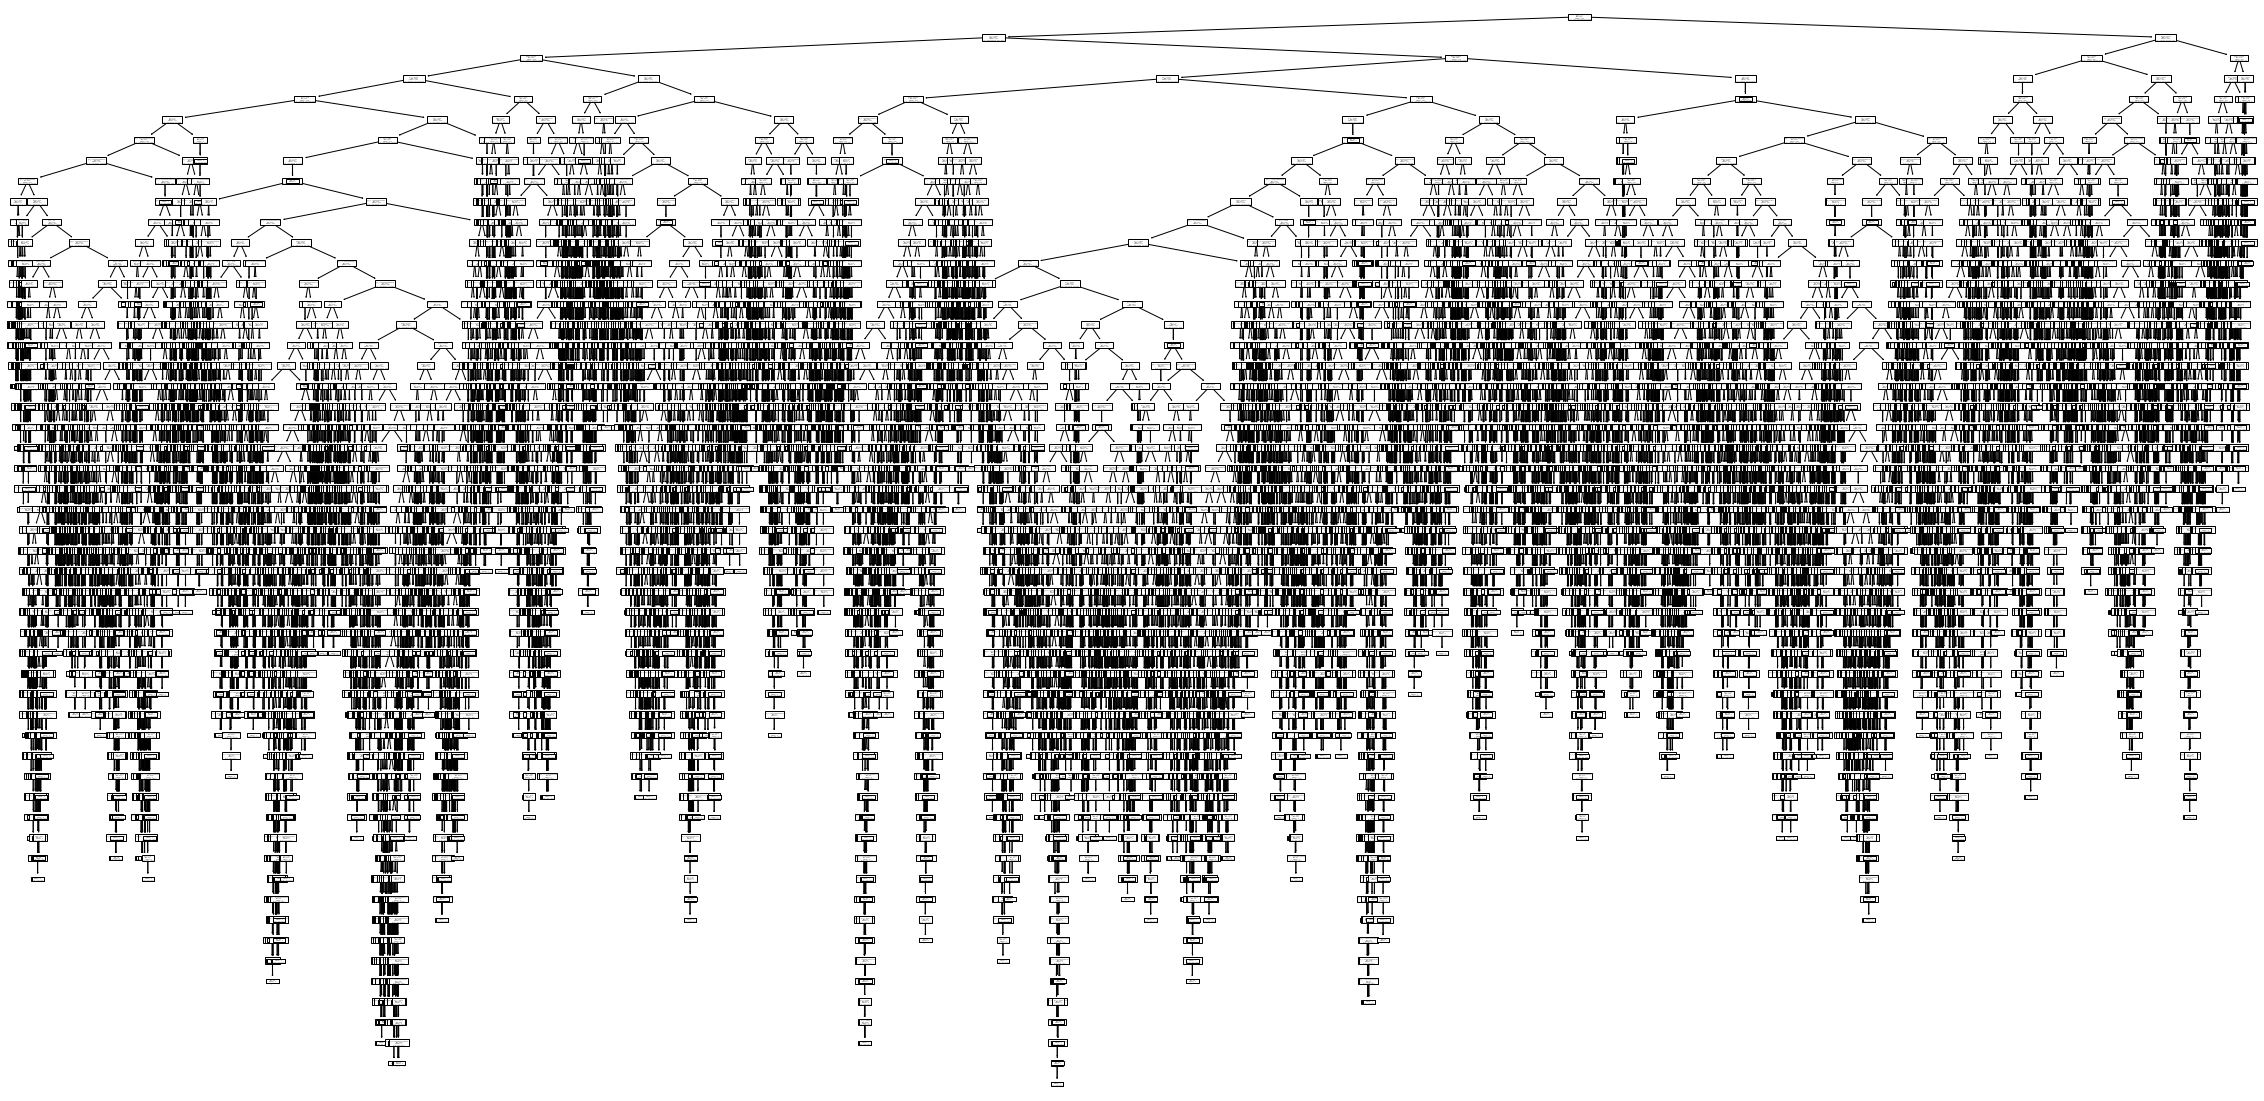

In [47]:
plt.figure()
plot_tree(cls, filled=False)
plt.show()

Para tornar o modelo mais visual, criamos um laço para a impressão dos pesos de cada atributo para determinar o score:

In [49]:
for feature, importancia in zip(reserva.columns, cls.feature_importances_):
    print("{}:{:.1f}%".format(feature,((importancia * 100))))

Cliente:10.6%
CEP_Cliente:11.2%
Pedido:11.1%
id_Pedido:0.7%
Produto:9.6%
Vendedor:7.7%
Preco_produto:7.6%
Frete:8.6%
Parcela:0.3%
Installments:3.8%
Valor_total:8.7%
ID_Review:11.0%
CEP_Vendedor:7.0%
Score:0.9%
Tipo_pagamento_boleto:0.8%
Tipo_pagamento_credit_card:0.2%
Tipo_pagamento_debit_card:0.3%


Vetor com predições para checagem do aprendizado:

In [50]:
result = cls.predict(X_test)
result

array([4, 2, 5, ..., 1, 5, 5])

Representação das métricas de precisão e médias do modelo:

In [51]:
from sklearn import metrics
print(metrics.classification_report(y_test,result))

              precision    recall  f1-score   support

           1       0.25      0.27      0.26      4432
           2       0.13      0.15      0.14      1194
           3       0.15      0.16      0.15      2916
           4       0.25      0.26      0.25      6709
           5       0.62      0.59      0.60     19948

    accuracy                           0.44     35199
   macro avg       0.28      0.29      0.28     35199
weighted avg       0.45      0.44      0.44     35199



Precisão total:

In [52]:
from sklearn.model_selection import cross_val_score
allScores = cross_val_score(cls, X_train, y_train , cv=10)
allScores.mean()

0.4298185802995252

Treinamento utilizando o dataframe reserva (apenas com os níveis de satisfação abaixo da média, score <=3).

Split do dataframe em treino e teste (70%, 30%, 
respectivamente).

In [53]:
X_train, X_test, y_train, y_test = train_test_split(reserva.drop('Score', axis=1), reserva['Score'], test_size=0.3)

Quantidade de amostras do treino:

In [54]:
X_train.shape, X_test.shape

((20145, 17), (8634, 17))

Classificador:

In [55]:
clf = DecisionTreeClassifier()

Treino:

In [56]:
clf = clf.fit(X_train, y_train)

Importância de cada atributo para determinar o nível de satisfação dos consumidores:

In [57]:
clf.feature_importances_

array([0.10574712, 0.10904861, 0.10175956, 0.0099057 , 0.09307006,
       0.08345456, 0.08590703, 0.08404335, 0.00242873, 0.03634772,
       0.09071357, 0.09860803, 0.07984158, 0.00732882, 0.00784238,
       0.001527  , 0.00242618])

In [58]:
for feature, importancia in zip(reserva.columns, clf.feature_importances_):
    print("{}:{:.1f}%".format(feature,((importancia*100))))

Cliente:10.6%
CEP_Cliente:10.9%
Pedido:10.2%
id_Pedido:1.0%
Produto:9.3%
Vendedor:8.3%
Preco_produto:8.6%
Frete:8.4%
Parcela:0.2%
Installments:3.6%
Valor_total:9.1%
ID_Review:9.9%
CEP_Vendedor:8.0%
Score:0.7%
Tipo_pagamento_boleto:0.8%
Tipo_pagamento_credit_card:0.2%
Tipo_pagamento_debit_card:0.2%


ANÁLISE DOS DADOS PROCESSADOS:

Com o objetivo de aumentar o review_score desse marketplace, utilizamos o algoritmo de árvore de decisão para encontrar elementos que influenciam diretamente a aceitação e satisfação dos clientes, analisando desde o processo de despacho do produto, até a qualidade do atendimento e do produto final. Dessa forma, utilizamos estratégias de filtragem. Inicialmente eliminamos os elementos que, evidentemente, não apresentavam influência sobre a nota registrada pelo cliente. Após esse passo inicial, simplificamos o tipo dos dados para facilitar o processamento do dataframe pelo algoritmo. Após o processo de preparar os dados para o aprendizado registramos os seguintes valores:

Considerando todas as notas (Ótimo, bom, mediano, ruim, péssimo) :

Cliente: 9.7%

CEP_Cliente: 11.6%

Pedido: 10.2%

id_Pedido: 0.4%

Produto: 8.6%

Vendedor: 8.8%

Preco_produto: 8.5%

Frete: 8.5%

Parcela: 0.1%

Installments: 3.7%

Valor_total: 10.2%

ID_Review: 10.3%

CEP_Vendedor: 7.6%

Score: 0.8%

Tipo_pagamento_boleto: 0.6%

Tipo_pagamento_credit_card: 0.2%

Tipo_pagamento_debit_card: 0.1%

Portanto, com base nos resultados obtidos, o dono do marketplace deve se atentar aos seguintes parâmetros de sua logística:

1 - Relação entre CEP_Cliente, Frete e CEP_Vendedor:

Esses atributos apresentaram importância direta na nota registrada pelo cliente, dessa forma, algumas razões devem ser consideradas:

- Problemas com a entrega.

- Qualidade da entrega(tempo de entrega,comprometimento do produto durante o processo de transporte).

- Alto preço do frete para determinadas regiões.

2 - Produto:

O atributo produto apresentou importância direta na insatisfação dos clientes. Portanto, deve-se considerar:

- Qualidade ruim de determinados produtos.

- O produto entregue não apresentar as características do produto anunciado.

- Entrega de produtos errados, problema de logística.

3 - Vendedor:

O atributo Vendedor apresentou importÂncia direta na insatisfação dos clientes. Portanto, deve-se considerar:

- Qualidade duvidosa do atendimento por parte do vendedor.

- Erro do vendedor em alguma etapa do processo em específico.

CONCLUSÃO:

Portanto, é possível concluir que para o marketplace aumentar seu score, analisar problemas logísticos por parte do processo de transporte, aspectos do produto e os vendedores são os fatores mais importantes para entender o que se passa na empresa e solucionar o problema que está gerando insatisfação dos clientes desse e-commerce.